In [3]:
#Import some basic libraries
import requests
import pandas as pd
import numpy as np
import json

This is a file to retrieve depatrutes data through Trafiklab Real Time API

In [9]:
df_sites[df_sites['name'] == 'Västerbroplan']

,id,gid,name,note,lat,lon,valid.from,abbreviation,alias,valid.to
501,1270,9091001000001270,Västerbroplan,NaN,59.328179,18.021123,2012-06-23T00:00:00,VBP,NaN,NaN


Now we get the realtime departures from Östra Station

In [38]:
siteId = "9600" #Östra Station
forecast_limit = "60" #forecast up to xx min
url = "https://transport.integration.sl.se/v1/sites/" + siteId + "/departures?forecast=" + forecast_limit

headers = {
    'accept': 'application/json',
    'Content-Type': 'application/json',
    'Accept-Encoding': 'identity'
}
data_json= requests.get(url,headers=headers).json() #Get data and process as JSON
departures_Östra_df = pd.json_normalize(data_json['departures']) #Put Departures in a dataframe
departures_Östra_df.head()

,destination,direction_code,direction,state,display,scheduled,expected,deviations,journey.id,journey.state,...,stop_area.name,stop_area.type,stop_point.id,stop_point.name,stop_point.designation,line.id,line.designation,line.transport_mode,line.group_of_lines,via
0,Vaxholm,1,Vaxholm,ATSTOP,Nu,2025-04-06T18:11:00,2025-04-06T18:11:00,[],2025040611811,NORMALPROGRESS,...,Tekniska högskolan,BUSTERM,60083,Tekniska högskolan,F,670,670,BUS,Blåbuss,NaN
1,Fruängen,2,Fruängen,EXPECTED,1 min,2025-04-06T18:13:00,2025-04-06T18:13:06,[],2025040626337,NORMALPROGRESS,...,Tekniska högskolan,METROSTN,2222,Tekniska högskolan,2,14,14,METRO,Tunnelbanans röda linje,T-Centralen
2,Gullmarsplan,1,Gullmarsplan,EXPECTED,2 min,2025-04-06T18:13:00,2025-04-06T18:13:50,[],2025040603075,NORMALPROGRESS,...,Östra station,BUSTERM,10317,Östra station,B,4,4,BUS,Blåbuss,NaN
3,Radiohuset,2,Radiohuset,EXPECTED,5 min,2025-04-06T18:04:00,2025-04-06T18:16:46,[],2025040603026,NORMALPROGRESS,...,Östra station,BUSTERM,10195,Östra station,M,4,4,BUS,Blåbuss,NaN
4,Åkersberga,2,Österskär,ATSTOP,5 min,2025-04-06T18:17:00,2025-04-06T18:17:00,[],2025040607836,ATORIGIN,...,Stockholms östra,TRAMSTN,7104,Stockholms östra,4,28,28,TRAM,Roslagsbanan,NaN


We also get the stop deviations (usually info on stops being moved, elevator not working etc.)

In [41]:
deviations_Östra_df = pd.json_normalize(data_json['stop_deviations'],max_level = 5) #Put Stop deviations in a dataframe
deviations_Östra_df.head()

,id,importance_level,message,scope.stop_areas,scope.lines
0,6417198,2,Tekniska högskolan: En hiss mot Odengatan är a...,"[{'id': 2221, 'name': 'Tekniska högskolan', 't...","[{'id': 13, 'designation': '13', 'transport_mo..."


Line data can be obtained as follows. You need to provide the transport authority id (see top of this file), which for SL is 1. When we put the data in a data frame

In [44]:
url = "https://transport.integration.sl.se/v1/lines"
headers = {
    'accept': 'application/json',
    'Content-Type': 'application/json',
    'Accept-Encoding': 'identity',
}

parameters = {
    'transport_authority_id' : '1'
}
r_data = requests.get(url,headers=headers, params=parameters).json() #Gets the data from the API server, and formats as JSON
df_bus_lines= pd.json_normalize(r_data['bus']) #Make a dataframe from the JSON data
df_bus_lines.head()

,id,gid,name,designation,transport_mode,group_of_lines,transport_authority.id,transport_authority.name,contractor.id,contractor.name,valid.from
0,1,9011001000100000,,1,BUS,Blåbuss,1,Storstockholms Lokaltrafik,10.0,Keolis,2007-08-24T00:00:00
1,2,9011001000200000,,2,BUS,Blåbuss,1,Storstockholms Lokaltrafik,10.0,Keolis,2007-08-24T00:00:00
2,3,9011001000300000,,3,BUS,Blåbuss,1,Storstockholms Lokaltrafik,10.0,Keolis,2007-08-24T00:00:00
3,4,9011001000400000,,4,BUS,Blåbuss,1,Storstockholms Lokaltrafik,10.0,Keolis,2007-08-24T00:00:00
4,6,9011001000600000,,6,BUS,Blåbuss,1,Storstockholms Lokaltrafik,10.0,Keolis,2017-12-10T00:00:00


In [ ]:
df_sites[df_sites['name'] == 'Radiohuset']

,id,gid,name,note,lat,lon,valid.from,abbreviation,alias,valid.to
6198,9600,9091001000009600,Stockholms östra,NaN,59.345548,18.071711,2024-05-22T00:00:00,ÖST,"[Östra station, Stockholm östra]",NaN


Now we get the realtime departures from Östra Station

In [ ]:
siteId = "1110" #Östra Station
forecast_limit = "60" #forecast up to xx min
url = "https://transport.integration.sl.se/v1/sites/" + siteId + "/departures?forecast=" + forecast_limit

headers = {
    'accept': 'application/json',
    'Content-Type': 'application/json',
    'Accept-Encoding': 'identity'
}
data_json= requests.get(url,headers=headers).json() #Get data and process as JSON
departures_slussen_df = pd.json_normalize(data_json['departures']) #Put Departures in a dataframe
departures_slussen_df.head()

,destination,direction_code,direction,state,display,scheduled,expected,deviations,journey.id,journey.state,journey.prediction_state,stop_area.id,stop_area.name,stop_area.type,stop_point.id,stop_point.name,line.id,line.designation,line.transport_mode,line.group_of_lines
0,Gullmarsplan,1,Gullmarsplan,ATSTOP,Nu,2025-03-27T16:23:00,2025-03-27T16:24:42,[],2025032702929,NORMALPROGRESS,NORMAL,10098,Radiohuset,BUSTERM,10667,Radiohuset,4,4,BUS,Blåbuss
1,Gullmarsplan,1,Gullmarsplan,EXPECTED,4 min,2025-03-27T16:30:00,2025-03-27T16:30:00,[],2025032702941,EXPECTED,NaN,10098,Radiohuset,BUSTERM,10667,Radiohuset,4,4,BUS,Blåbuss
2,Ropsten,2,Ropsten,EXPECTED,5 min,2025-03-27T16:25:20,2025-03-27T16:31:11,[],2025032707842,NORMALPROGRESS,NORMAL,10098,Radiohuset,BUSTERM,10099,Radiohuset,76,76,BUS,NaN
3,Norra Hammarbyhamnen,1,Norra Hammarbyhamnen,EXPECTED,9 min,2025-03-27T16:33:24,2025-03-27T16:35:03,[],2025032707848,NORMALPROGRESS,NORMAL,10098,Radiohuset,BUSTERM,10098,Radiohuset,76,76,BUS,NaN
4,Gullmarsplan,1,Gullmarsplan,EXPECTED,12 min,2025-03-27T16:38:00,2025-03-27T16:38:00,[],2025032702951,EXPECTED,NaN,10098,Radiohuset,BUSTERM,10667,Radiohuset,4,4,BUS,Blåbuss


We also get the stop deviations (usually info on stops being moved, elevator not working etc.)

In [ ]:
deviations_slussen_df = pd.json_normalize(data_json['stop_deviations'],max_level = 5) #Put Stop deviations in a dataframe
deviations_slussen_df.head()

""


In [ ]:
df_sites[df_sites['name'] == 'Gullmarsplan']

,id,gid,name,note,lat,lon,valid.from,abbreviation,alias,valid.to
6074,9189,9091001000009189,Gullmarsplan,NaN,59.298422,18.080936,2012-06-23T00:00:00,GUP,NaN,NaN


Now we get the realtime departures from Östra Station

In [ ]:
siteId = "9189" #Gullmarsplan
forecast_limit = "60" #forecast up to xx min
url = "https://transport.integration.sl.se/v1/sites/" + siteId + "/departures?forecast=" + forecast_limit

headers = {
    'accept': 'application/json',
    'Content-Type': 'application/json',
    'Accept-Encoding': 'identity'
}
data_json= requests.get(url,headers=headers).json() #Get data and process as JSON
departures_slussen_df = pd.json_normalize(data_json['departures']) #Put Departures in a dataframe
departures_slussen_df.head()

,destination,direction_code,direction,state,display,scheduled,expected,deviations,journey.id,journey.state,...,stop_area.type,stop_point.id,stop_point.name,stop_point.designation,line.id,line.designation,line.transport_mode,journey.prediction_state,line.group_of_lines,via
0,Jordbro (Västerbommen),1,Jordbro,EXPECTED,Nu,2025-03-27T16:26:00,2025-03-27T16:26:00,[],2025032700017,EXPECTED,...,BUSTERM,80003,Gullmarsplan,G,810,810,BUS,NaN,NaN,NaN
1,Södra Hedvigslund,1,Södra Hedvigslund,ATSTOP,Nu,2025-03-27T16:30:00,2025-03-27T16:30:00,[],2025032700007,NORMALPROGRESS,...,BUSTERM,82005,Gullmarsplan,U,814,814,BUS,NORMAL,NaN,NaN
2,Tyresö centrum,1,Tyresö centrum,ATSTOP,Nu,2025-03-27T16:30:00,2025-03-27T16:30:00,[],2025032700089,NORMALPROGRESS,...,BUSTERM,82010,Gullmarsplan,O,802,802,BUS,NORMAL,NaN,NaN
3,Nyfors,1,Nyfors,ATSTOP,Nu,2025-03-27T16:30:00,2025-03-27T16:30:00,[],2025032700091,NORMALPROGRESS,...,BUSTERM,82011,Gullmarsplan,N,873,873,BUS,NORMAL,Blåbuss,NaN
4,Åkeshov,1,Hässelby strand,ATSTOP,Nu,2025-03-27T16:31:00,2025-03-27T16:31:00,[],2025032711045,NORMALPROGRESS,...,METROSTN,1551,Gullmarsplan,1,17,17,METRO,NORMAL,Tunnelbanans gröna linje,NaN


We also get the stop deviations (usually info on stops being moved, elevator not working etc.)

In [ ]:
deviations_slussen_df = pd.json_normalize(data_json['stop_deviations'],max_level = 5) #Put Stop deviations in a dataframe
deviations_slussen_df["message"]

,message
0,Extrainsatta spårvagnar från Globen mot Solna ...


In [3]:
#Let's first import the necessary libraries
from datetime import datetime, timedelta
import time
import os

In [19]:
def get_departures(site_id, forecast_limit):
    url = f"https://transport.integration.sl.se/v1/sites/{site_id}/departures?forecast={forecast_limit}"
    headers = {
        'accept': 'application/json',
        'Content-Type': 'application/json',
        'Accept-Encoding': 'identity'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data_json = response.json()
        return pd.json_normalize(data_json['departures'])
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")
        return None

def create_filename(station_name, site_id):
    now = datetime.now()
    date_str = now.strftime("%Y%m%d")
    time_str = now.strftime("%H%M")  # Hour and minute
    filename = f"{station_name}_{site_id}_departures_{date_str}_{time_str}.csv"
    folder_path = '/Users/y.sota/Downloads/AH2173_public_transport/collected_data'
    return os.path.join(folder_path, filename)

In [33]:
import os
from datetime import datetime, timedelta
import time
import pandas as pd
import requests

###This is where we need to adjust according to which bus stops we focus
station_name = "Gullmarsplan"
site_id = "9189"
file_path = create_filename(station_name, site_id)
forecast_limit = '60'
# Set the duration of data storage; how long should we collect it? 2-3hours? 
duration = timedelta(hours=0, minutes=0, seconds=60)  
###########################################################################

end_time = datetime.now() + duration
departures_data = pd.DataFrame()

while datetime.now() < end_time:
    departures_df = get_departures(site_id, forecast_limit)
    if departures_df is not None:
        departures_data = pd.concat([departures_data, departures_df], ignore_index=True)
        print("Data appended to DataFrame")
    ##setting the interval collecting data (seconds) 
    time.sleep(10) #@@ seconds 
 
departures_data.to_csv(file_path, index=False)
print(f"Data saved to {file_path}")

Data appended to DataFrame
Data appended to DataFrame
Data appended to DataFrame
Data appended to DataFrame
Data appended to DataFrame
Data appended to DataFrame
Data saved to /Users/y.sota/Downloads/AH2173_public_transport/collected_data/Gullmarsplan_9189_departures_20250408_1311.csv


In [80]:
import os
import time
import requests
import pandas as pd
from datetime import datetime, timedelta
from concurrent.futures import ThreadPoolExecutor

def get_departures(site_id, forecast_limit):
    url = f"https://transport.integration.sl.se/v1/sites/{site_id}/departures?forecast={forecast_limit}"
    headers = {
        'accept': 'application/json',
        'Content-Type': 'application/json',
        'Accept-Encoding': 'identity'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data_json = response.json()
        return pd.json_normalize(data_json['departures'])
    else:
        print(f"[{site_id}] Failed to fetch data. Status code: {response.status_code}")
        return None

#create file names
def create_filename(station_name, site_id):
    now = datetime.now()
    date_str = now.strftime("%Y%m%d")
    time_str = now.strftime("%H%M")
    filename = f"{station_name}_{site_id}_departures_{date_str}_{time_str}.csv"
    folder_path = '/Users/y.sota/Downloads/AH2173_public_transport/collected_data'
    os.makedirs(folder_path, exist_ok=True)
    return os.path.join(folder_path, filename)

#collect data
def collect_data_for_station(station_name, site_id, forecast_limit, duration_seconds, interval_seconds):
    print(f"[{station_name}] Starting data collection for {duration_seconds} seconds...")
    end_time = datetime.now() + timedelta(seconds=duration_seconds)
    departures_data = pd.DataFrame()

    while datetime.now() < end_time:
        departures_df = get_departures(site_id, forecast_limit)
        if departures_df is not None:
            departures_data = pd.concat([departures_data, departures_df], ignore_index=True)
            print(f"[{station_name}] Data appended at {datetime.now().strftime('%H:%M:%S')}")
        time.sleep(interval_seconds)

    file_path = create_filename(station_name, site_id)
    departures_data.to_csv(file_path, index=False)
    print(f"[{station_name}] Data saved to {file_path}")

# ========== Customize below ==========
stations = [("Gullmarsplan", "9189"),     ("Radiohuset", "1110"),
            ("Ropsten", "9220"),          ("Karolinska institutet Biomedicum", "3406"), 
            ("Slussen", "9192"),          ("Nacka Forum", "4040"),
            ("Hemmesta vägskäl", "4500"), ("Centralen", "1002")]  # List of (name, site_id)
forecast_limit = '60'
duration_seconds = 1800  # Total collection time for each station
interval_seconds = 60  # Time between each request
# =====================================

# Run data collection for each station concurrently
with ThreadPoolExecutor() as executor:
    futures = [
        executor.submit(collect_data_for_station, name, site_id, forecast_limit, duration_seconds, interval_seconds)
        for name, site_id in stations
    ]

    for future in futures:
        future.result()  # Wait for each to finish


[Gullmarsplan] Starting data collection for 1800 seconds...
[Radiohuset] Starting data collection for 1800 seconds...
[Ropsten] Starting data collection for 1800 seconds...
[Karolinska institutet Biomedicum] Starting data collection for 1800 seconds...
[Slussen] Starting data collection for 1800 seconds...
[Nacka Forum] Starting data collection for 1800 seconds...
[Hemmesta vägskäl] Starting data collection for 1800 seconds...
[Centralen] Starting data collection for 1800 seconds...
[Hemmesta vägskäl] Data appended at 17:31:09
[Ropsten] Data appended at 17:31:09
[Radiohuset] Data appended at 17:31:09
[Karolinska institutet Biomedicum] Data appended at 17:31:09
[Centralen] Data appended at 17:31:09
[Nacka Forum] Data appended at 17:31:09
[Gullmarsplan] Data appended at 17:31:09
[Slussen] Data appended at 17:31:09
[Hemmesta vägskäl] Data appended at 17:32:09
[Radiohuset] Data appended at 17:32:09
[Ropsten] Data appended at 17:32:09
[Karolinska institutet Biomedicum] Data appended at 17:3

In [17]:
# import os
# import time
# import requests
# import pandas as pd
# from datetime import datetime, timedelta
# from concurrent.futures import ThreadPoolExecutor

# def get_departures(site_id, forecast_limit):
#     url = f"https://transport.integration.sl.se/v1/sites/{site_id}/departures?forecast={forecast_limit}"
#     headers = {
#         'accept': 'application/json',
#         'Content-Type': 'application/json',
#         'Accept-Encoding': 'identity'
#     }
#     response = requests.get(url, headers=headers)
#     if response.status_code == 200:
#         data_json = response.json()
#         return pd.json_normalize(data_json['departures'])
#     else:
#         print(f"[{site_id}] Failed to fetch data. Status code: {response.status_code}")
#         return None

# #create file names
# def create_filename(station_name, site_id, output_folder):
#     now = datetime.now()
#     date_str = now.strftime("%Y%m%d")
#     time_str = now.strftime("%H%M")
#     filename = f"{station_name}_{site_id}_departures_{date_str}_{time_str}.csv"
#     return os.path.join(output_folder, filename)

# #collect data
# def collect_data_for_station(station_name, site_id, forecast_limit, duration_seconds, interval_seconds, output_folder):
#     print(f"[{station_name}] Starting data collection for {duration_seconds} seconds...")
#     end_time = datetime.now() + timedelta(seconds=duration_seconds)
#     departures_data = pd.DataFrame()

#     while datetime.now() < end_time:
#         departures_df = get_departures(site_id, forecast_limit)
#         if departures_df is not None:
#             # Add timestamp of collection to each row
#             collected_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
#             departures_df['collected_at'] = collected_time
#             # ✅ Add station name and site ID columns here
#             departures_df['station_name'] = station_name
#             departures_df['site_id'] = site_id
            
#             departures_data = pd.concat([departures_data, departures_df], ignore_index=True)
#             print(f"[{station_name}] Data appended at {datetime.now().strftime('%H:%M:%S')}")
#         time.sleep(interval_seconds)
#     file_path = create_filename(station_name, site_id, output_folder)
#     departures_data.to_csv(file_path, index=False)
#     print(f"[{station_name}] Data saved to {file_path}")

# # ========== Customize below ==========
# #List of (name, site_id)
# stations = [("Gullmarsplan", "9189"), ("Västerbroplan", "1270"), ("Radiohuset", "1110"), ("Garnisonen", "1113"), ("Skanstull", "9190"),  ##line 4
#             ("Ropsten", "9220"), ("Roslagsgatan", "1083"), ("Karolinska institutet Biomedicum", "3406"), ("Karolinska sjukhuset Eugeniavägen", "3401"), ("Drevergatan", "1145"),##line 6
#             ("Slussen", "9192"), ("Gäddviken", "1452"), ("Nacka Forum", "4040"), ("Nacka gymnasium", "4063"), ##line 402
#             ("Nacka Forum, stadshuset", "4033")
#             ("Strömvägen", "4180"), ("Londonviadukten", "1461"), ("Skurustugan", "4028")]     ##Line 413 slussen-Strömvägen  Begining ("Slussen", "9192"), Middle ("Nacka Forum", "4040")
# forecast_limit = '60'  # minutes
# duration_seconds = 60 * 60 * 2.3 # seconds # total collection time for each station 
# interval_seconds = 20  # Time between each request
# # =====================================

# # Create a timestamped folder to store this session's data
# run_timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
# output_folder = f'/Users/y.sota/Downloads/AH2173_public_transport/collected_data/{run_timestamp}'
# os.makedirs(output_folder, exist_ok=True)

# # # Run data collection for each station concurrently
# # with ThreadPoolExecutor() as executor:
# #     futures = [
# #         executor.submit(collect_data_for_station, name, site_id, forecast_limit, duration_seconds, interval_seconds, output_folder)
# #         for name, site_id in stations
# #     ]
# #     for future in futures:
# #         future.result()  # Wait for each to finish

# # Run data collection for each station concurrently
# with ThreadPoolExecutor(max_workers=len(stations)) as executor:  # ✅ specify max_workers
#     futures = [
#         executor.submit(collect_data_for_station, name, site_id, forecast_limit, duration_seconds, interval_seconds, output_folder)
#         for name, site_id in stations
#     ]
#     for future in futures:
#         future.result()  # Wait for each to finish

In [19]:
# import os, time, requests, pandas as pd, threading, csv
# from datetime import datetime, timedelta
# from concurrent.futures import ThreadPoolExecutor
# from requests.adapters import HTTPAdapter
# from urllib3.util.retry import Retry

# # ---------- Robust HTTP session with retries ----------
# session = requests.Session()
# retries = Retry(
#     total=5,               # 5 tries (initial + 4 retries)
#     backoff_factor=0.5,    # 0.5s, 1s, 2s, 4s …
#     status_forcelist=[500, 502, 503, 504],  # retry on these HTTP codes
#     raise_on_status=False
# )
# session.mount("https://", HTTPAdapter(max_retries=retries))

# # ---------- Thread-safe print ----------
# print_lock = threading.Lock()
# def tprint(*args, **kwargs):
#     with print_lock:
#         print(*args, **kwargs, flush=True)

# # ---------- Download helpers ----------
# def get_departures(site_id, forecast_limit, timeout=5):
#     url = f"https://transport.integration.sl.se/v1/sites/{site_id}/departures?forecast={forecast_limit}"
#     headers = {
#         "accept": "application/json",
#         "Content-Type": "application/json",
#         "Accept-Encoding": "identity",
#     }
#     try:
#         resp = session.get(url, headers=headers, timeout=timeout)
#         if resp.status_code == 200:
#             data = resp.json()["departures"]
#             return pd.json_normalize(data)
#         tprint(f"[{site_id}] HTTP {resp.status_code}")
#     except requests.RequestException as e:
#         tprint(f"[{site_id}] network error → {e}")
#     return None  # any failure returns None

# def filename(station, site_id, outdir):
#     ts = datetime.now().strftime("%Y%m%d_%H%M")
#     return os.path.join(outdir, f"{station}_{site_id}_departures_{ts}.csv")

# # ---------- Main worker ----------
# def collect(station, site_id, forecast_limit, run_seconds, gap_seconds, outdir):
#     tprint(f"[{station}] collecting for {run_seconds}s …")
#     stop_time = datetime.now() + timedelta(seconds=run_seconds)
#     outfile = filename(station, site_id, outdir)

#     # Open CSV once, append every loop (so nothing is lost on Ctrl-C)
#     first_write = True
#     with open(outfile, "w", newline="", encoding="utf-8") as f:
#         writer = None

#         while datetime.now() < stop_time:
#             df = get_departures(site_id, forecast_limit)
#             if df is not None and not df.empty:
#                 df["collected_at"] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
#                 df["station_name"] = station
#                 df["site_id"] = site_id

#                 # CSV header only the first time
#                 if first_write:
#                     writer = csv.writer(f)
#                     writer.writerow(df.columns)  # header
#                     first_write = False
#                 df.to_csv(f, header=False, index=False)
#                 tprint(f"[{station}] wrote {len(df)} rows at {datetime.now():%H:%M:%S}")
#             time.sleep(gap_seconds)

#     tprint(f"[{station}] finished → {outfile}")

# # ---------- Parameters ----------
# stations = [
#     ("Gullmarsplan", "9189"), ("Västerbroplan", "1270"), ("Radiohuset", "1110"),
#     ("Garnisonen", "1113"), ("Skanstull", "9190"), ("Ropsten", "9220"),
#     ("Roslagsgatan", "1083"), ("Karolinska institutet Biomedicum", "3406"),
#     ("Karolinska sjukhuset Eugeniavägen", "3401"), ("Drevergatan", "1145"),
#     ("Slussen", "9192"), ("Gäddviken", "1452"), ("Nacka Forum", "4040"),
#     ("Nacka gymnasium", "4063"), ("Strömvägen", "4180"), ("Londonviadukten", "1461"),
#     ("Skurustugan", "4028")
# ]
# forecast_limit   = 60             # minutes
# run_seconds      = int(60*60*2.5) # ≈ 2 h 12 min
# gap_seconds      = 20             # poll interval
# outdir           = os.path.join(
#     "/Users/y.sota/Downloads/AH2173_public_transport/collected_data",
#     datetime.now().strftime("%Y%m%d_%H%M%S"),
# )
# os.makedirs(outdir, exist_ok=True)

# # ---------- Fire it up ----------
# if __name__ == "__main__":
#     with ThreadPoolExecutor(max_workers=len(stations)) as pool:
#         futures = [
#             pool.submit(
#                 collect, name, sid, forecast_limit, run_seconds, gap_seconds, outdir
#             )
#             for name, sid in stations
#         ]
#         for fut in futures:  # bubble up any exceptions
#             fut.result()


In [1]:
import os, time, requests, pandas as pd, threading, csv
from datetime import datetime, timedelta
from concurrent.futures import ThreadPoolExecutor
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

# ---------- Robust HTTP session with retries ----------
session = requests.Session()
retries = Retry(
    total=5,               # 5 tries (initial + 4 retries)
    backoff_factor=0.5,    # 0.5s, 1s, 2s, 4s …
    status_forcelist=[500, 502, 503, 504],  # retry on these HTTP codes
    raise_on_status=False
)
session.mount("https://", HTTPAdapter(max_retries=retries))

# ---------- Thread-safe print ----------
print_lock = threading.Lock()
def tprint(*args, **kwargs):
    with print_lock:
        print(*args, **kwargs, flush=True)

# ---------- Download helpers ----------
def get_departures(site_id, forecast_limit, timeout=5):
    url = f"https://transport.integration.sl.se/v1/sites/{site_id}/departures?forecast={forecast_limit}"
    headers = {
        "accept": "application/json",
        "Content-Type": "application/json",
        "Accept-Encoding": "identity",
    }
    try:
        resp = session.get(url, headers=headers, timeout=timeout)
        if resp.status_code == 200:
            data = resp.json()["departures"]
            return pd.json_normalize(data)
        tprint(f"[{site_id}] HTTP {resp.status_code}")
    except requests.RequestException as e:
        tprint(f"[{site_id}] network error → {e}")
    return None  # any failure returns None

def filename(station, site_id, outdir):
    ts = datetime.now().strftime("%Y%m%d_%H%M")
    return os.path.join(outdir, f"{station}_{site_id}_departures_{ts}.csv")

# ---------- Main worker ----------
def collect(station, site_id, forecast_limit, run_seconds, gap_seconds, outdir):
    tprint(f"[{station}] collecting for {run_seconds}s …")
    stop_time = datetime.now() + timedelta(seconds=run_seconds)
    outfile = filename(station, site_id, outdir)

    # Open CSV once, append every loop (so nothing is lost on Ctrl-C)
    first_write = True
    with open(outfile, "w", newline="", encoding="utf-8") as f:
        writer = None

        while datetime.now() < stop_time:
            df = get_departures(site_id, forecast_limit)
            if df is not None and not df.empty:
                df["collected_at"] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
                df["station_name"] = station
                df["site_id"] = site_id

                # CSV header only the first time
                if first_write:
                    writer = csv.writer(f)
                    writer.writerow(df.columns)  # header
                    first_write = False
                df.to_csv(f, header=False, index=False)
                tprint(f"[{station}] wrote {len(df)} rows at {datetime.now():%H:%M:%S}")
            time.sleep(gap_seconds)

    tprint(f"[{station}] finished → {outfile}")

# ---------- Parameters ----------
stations = [
    ("Gullmarsplan", "9189"), ("Västerbroplan", "1270"), ("Radiohuset", "1110"),
    ("Garnisonen", "1113"), ("Skanstull", "9190"), ("Ropsten", "9220"),
    ("Roslagsgatan", "1083"), ("Karolinska institutet Biomedicum", "3406"), ("Karolinska sjukhuset Eugeniavägen", "3401"), 
    ("Drevergatan", "1145"), ("Slussen", "9192"), ("Gäddviken", "1452"), ("Nacka gymnasium", "4063"), ("Glasbrukssjön","4181"),
    ("Strömvägen", "4180"), ("Londonviadukten", "1461"), ("Skurustugan", "4028"), ("Nacka Forum, stadshuset", "4033")
]
forecast_limit   = 60             # minutes
run_seconds      = int(60*60*1.5) # ≈ 2 h 12 min
gap_seconds      = 20             # poll interval
outdir           = os.path.join(
    "/Users/y.sota/Downloads/AH2173_public_transport/collected_data",
    datetime.now().strftime("%Y%m%d_%H%M%S"),
)
os.makedirs(outdir, exist_ok=True)

# ---------- Fire it up ----------
if __name__ == "__main__":
    with ThreadPoolExecutor(max_workers=len(stations)) as pool:
        futures = [
            pool.submit(
                collect, name, sid, forecast_limit, run_seconds, gap_seconds, outdir
            )
            for name, sid in stations
        ]
        for fut in futures:  # bubble up any exceptions
            fut.result()


[Gullmarsplan] collecting for 5400s …
[Västerbroplan] collecting for 5400s …
[Radiohuset] collecting for 5400s …
[Garnisonen] collecting for 5400s …
[Skanstull] collecting for 5400s …
[Ropsten] collecting for 5400s …
[Roslagsgatan] collecting for 5400s …
[Karolinska institutet Biomedicum] collecting for 5400s …
[Karolinska sjukhuset Eugeniavägen] collecting for 5400s …
[Drevergatan] collecting for 5400s …
[Slussen] collecting for 5400s …
[Gäddviken] collecting for 5400s …
[Nacka gymnasium] collecting for 5400s …
[Glasbrukssjön] collecting for 5400s …
[Strömvägen] collecting for 5400s …
[Londonviadukten] collecting for 5400s …
[Skurustugan] collecting for 5400s …
[Nacka Forum, stadshuset] collecting for 5400s …
[Glasbrukssjön] wrote 1 rows at 15:04:07
[Drevergatan] wrote 6 rows at 15:04:07
[Karolinska sjukhuset Eugeniavägen] wrote 16 rows at 15:04:07
[Skurustugan] wrote 20 rows at 15:04:07
[Nacka Forum, stadshuset] wrote 5 rows at 15:04:07
[Karolinska institutet Biomedicum] wrote 13 row

In [3]:
# #file_path = "____________replace_______________me________"
# file_path = "/Users/y.sota/Downloads/AH2173_public_transport/collected_data/20250414_144219/Karolinska institutet Biomedicum_3406_departures_20250414_1443.csv"

# #after storing the data I need to import them for further analysis
# departures_data = pd.read_csv(file_path)
# #drop duplicates (this may take some time)
# departures_data = departures_data.drop_duplicates()

# # Let's estimate the delay per departure
# # Convert strings to datetime objects
# departures_data['scheduled'] = pd.to_datetime(departures_data['scheduled'])
# departures_data['expected'] = pd.to_datetime(departures_data['expected'])
# # Calculate the difference
# departures_data['delay'] = (departures_data['expected'] - departures_data['scheduled']).dt.total_seconds() #convert the difference to seconds

# # Extract the hour component and store it in a separate column
# departures_data['hour'] = departures_data['scheduled'].dt.hour
# departures_data['minute'] = departures_data['scheduled'].dt.minute
# departures_data['time'] = departures_data['scheduled'].dt.strftime('%H:%M:%S')
# print(departures_data.columns)
# departures_data.head()

Index(['destination', 'direction_code', 'direction', 'state', 'display',
       'scheduled', 'expected', 'deviations', 'journey.id', 'journey.state',
       'journey.prediction_state', 'stop_area.id', 'stop_area.name',
       'stop_area.type', 'stop_point.id', 'stop_point.name',
       'stop_point.designation', 'line.id', 'line.designation',
       'line.transport_mode', 'line.group_of_lines', 'collected_at', 'delay',
       'hour', 'minute', 'time'],
      dtype='object')


,destination,direction_code,direction,state,display,scheduled,expected,deviations,journey.id,journey.state,...,stop_point.designation,line.id,line.designation,line.transport_mode,line.group_of_lines,collected_at,delay,hour,minute,time
0,Liljeholmen,1,Liljeholmen,EXPECTED,Nu,2025-04-14 14:43:25,2025-04-14 14:42:27,[],2025041407979,NORMALPROGRESS,...,2.0,77,77,BUS,NaN,2025-04-14 14:42:20,-58.0,14,43,14:43:25
1,Karolinska sjukhuset,2,Karolinska sjukhuset,EXPECTED,3 min,2025-04-14 14:40:55,2025-04-14 14:45:20,[],2025041401706,NORMALPROGRESS,...,NaN,3,3,BUS,Blåbuss,2025-04-14 14:42:20,265.0,14,40,14:40:55
2,Södersjukhuset,1,Södersjukhuset,EXPECTED,3 min,2025-04-14 14:45:51,2025-04-14 14:45:51,[],2025041401738,EXPECTED,...,2.0,3,3,BUS,Blåbuss,2025-04-14 14:42:20,0.0,14,45,14:45:51
3,Frihamnen,1,Frihamnen,EXPECTED,4 min,2025-04-14 14:46:49,2025-04-14 14:46:49,[],2025041407404,EXPECTED,...,NaN,72,72,BUS,NaN,2025-04-14 14:42:20,0.0,14,46,14:46:49
4,Ropsten,1,Ropsten,EXPECTED,6 min,2025-04-14 14:49:00,2025-04-14 14:49:00,[],2025041430926,EXPECTED,...,2.0,6,6,BUS,Blåbuss,2025-04-14 14:42:20,0.0,14,49,14:49:00


In [21]:
# folder_path = "/Users/y.sota/Downloads/AH2173_public_transport/collected_data/20250409_180408"

# import os
# import pandas as pd

# def compile_csv_folder(folder_path):
#     """
#     Reads all CSV files in the given folder, drops duplicates, and combines them into a single DataFrame.
    
#     Parameters:
#         folder_path (str): The path to the folder containing the CSV files.
        
#     Returns:
#         pd.DataFrame: A combined DataFrame with all unique rows from all CSV files.
#     """
#     all_dataframes = []
#     for file in os.listdir(folder_path):
#         file_path = os.path.join(folder_path, file)
#         try:
#             df = pd.read_csv(file_path)
#             df = df.drop_duplicates(subset=["scheduled"], keep = "last")  # Drop duplicates within the file
#             all_dataframes.append(df)
#         except Exception as e:
#             print(f"Error reading {file_path}: {e}")

#     if all_dataframes:
#         combined_df = pd.concat(all_dataframes, ignore_index=True)
#         return combined_df
#     else:
#         print("No files could be read.")
#         return pd.DataFrame()
        
# om_departure_data = compile_csv_folder(folder_path)
# om_departure_data.head(6)
# #om_departure_data = departure_data.dropna(subset=["scheduled"], keep = "last")

,destination,direction_code,direction,state,display,scheduled,expected,deviations,journey.id,journey.state,...,stop_point.id,stop_point.name,line.id,line.designation,line.transport_mode,line.group_of_lines,journey.prediction_state,via,collected_at,stop_point.designation
0,Slussen,2,Slussen,EXPECTED,7 min,2025-04-09T18:12:00,2025-04-09T18:12:00,[],2025040900198,EXPECTED,...,41536,Hemmesta vägskäl,474,474,BUS,Blåbuss,NaN,NaN,2025-04-09 18:04:38,NaN
1,Lillsved,1,Lillsved,EXPECTED,7 min,2025-04-09T18:05:00,2025-04-09T18:12:16,[],2025040900019,NORMALPROGRESS,...,41535,Hemmesta vägskäl,437,437,BUS,NaN,NORMAL,NaN,2025-04-09 18:04:38,NaN
2,Slussen,2,Slussen,EXPECTED,11 min,2025-04-09T18:13:00,2025-04-09T18:15:32,[],2025040900014,NORMALPROGRESS,...,41536,Hemmesta vägskäl,438,438,BUS,NaN,NORMAL,NaN,2025-04-09 18:04:38,NaN
3,Kalvsvik,1,Boda,EXPECTED,17 min,2025-04-09T18:21:00,2025-04-09T18:21:38,[],2025040900015,NORMALPROGRESS,...,41535,Hemmesta vägskäl,438,438,BUS,NaN,NORMAL,Boda,2025-04-09 18:04:38,NaN
4,Slussen,2,Slussen,EXPECTED,17 min,2025-04-09T18:22:00,2025-04-09T18:22:00,[],2025040900200,EXPECTED,...,41536,Hemmesta vägskäl,474,474,BUS,Blåbuss,NaN,NaN,2025-04-09 18:04:38,NaN
5,Hemmesta,2,Slussen,EXPECTED,25 min,2025-04-09T18:30:00,2025-04-09T18:30:00,[],2025040900010,EXPECTED,...,41536,Hemmesta vägskäl,439,439,BUS,NaN,NaN,NaN,2025-04-09 18:04:38,NaN


In [11]:
#filtering by line number and stop condition
#departures_data.loc[(departures_data["state"] == "ATSTOP") & (departures_data["line.id"] == 4)]
# om_departure_data.loc[om_departure_data["line.id"] == 6].head()


,destination,direction_code,direction,state,display,scheduled,expected,deviations,journey.id,journey.state,...,stop_point.designation,line.id,line.designation,line.transport_mode,line.group_of_lines,collected_at,delay,hour,minute,time
4,Ropsten,1,Ropsten,EXPECTED,6 min,2025-04-14 14:49:00,2025-04-14 14:49:00,[],2025041430926,EXPECTED,...,2.0,6,6,BUS,Blåbuss,2025-04-14 14:42:20,0.0,14,49,14:49:00
11,Ropsten,1,Ropsten,EXPECTED,16 min,2025-04-14 14:59:00,2025-04-14 14:59:00,[],2025041430927,EXPECTED,...,2.0,6,6,BUS,Blåbuss,2025-04-14 14:42:20,0.0,14,59,14:59:00
16,Ropsten,1,Ropsten,EXPECTED,23 min,2025-04-14 15:06:00,2025-04-14 15:06:00,[],2025041430928,EXPECTED,...,2.0,6,6,BUS,Blåbuss,2025-04-14 14:42:20,0.0,15,6,15:06:00
28,Ropsten,1,Ropsten,EXPECTED,6 min,2025-04-14 14:49:00,2025-04-14 14:49:00,[],2025041430926,EXPECTED,...,2.0,6,6,BUS,Blåbuss,2025-04-14 14:42:50,0.0,14,49,14:49:00
35,Ropsten,1,Ropsten,EXPECTED,16 min,2025-04-14 14:59:00,2025-04-14 14:59:00,[],2025041430927,EXPECTED,...,2.0,6,6,BUS,Blåbuss,2025-04-14 14:42:50,0.0,14,59,14:59:00


In [29]:
#departures_data.loc[departures_data["destination"] == "Karolinska institutet"]

In [6]:
import requests
import pandas as pd


import os, time, requests, pandas as pd, threading, csv
from datetime import datetime, timedelta
from concurrent.futures import ThreadPoolExecutor
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

# ---------- Robust HTTP session with retries ----------
session = requests.Session()
retries = Retry(
    total=5,               # 5 tries (initial + 4 retries)
    backoff_factor=0.5,    # 0.5s, 1s, 2s, 4s …
    status_forcelist=[500, 502, 503, 504],  # retry on these HTTP codes
    raise_on_status=False
)
session.mount("https://", HTTPAdapter(max_retries=retries))

# ---------- Thread-safe print ----------
print_lock = threading.Lock()
def tprint(*args, **kwargs):
    with print_lock:
        print(*args, **kwargs, flush=True)

# ---------- Download helpers ----------
def get_departures(site_id, forecast_limit=10, timeout=5):
    url = f"https://transport.integration.sl.se/v1/sites/{site_id}/departures?forecast={forecast_limit}"
    headers = {
        "accept": "application/json",
        "Content-Type": "application/json",
        "Accept-Encoding": "identity",
    }
    try:
        response = requests.get(url, headers=headers, timeout=timeout)
        if response.status_code == 200:
            data = response.json()["departures"]
            df = pd.json_normalize(data)
            # Select specific columns of interest
            selected_columns = ['destination', 'direction_code', 'state',  'line.id',
                                'line.transport_mode',  'scheduled',  'expected', 'direction', 
                                'deviations', 'journey.id', 'journey.state','stop_area.id', 'stop_area.name',
                                'stop_point.id', 'display','stop_point.name', 'line.designation'
            ]
            df = df[selected_columns]
            return df
        else:
            print(f"[{site_id}] HTTP {response.status_code}")
    except requests.RequestException as e:
        print(f"[{site_id}] Network error: {e}")
    return None

def filename(station, site_id, outdir):
    ts = datetime.now().strftime("%Y%m%d_%H%M")
    return os.path.join(outdir, f"{station}_{site_id}_departures_{ts}.csv")

# ---------- Main worker ----------
def collect(station, site_id, forecast_limit, run_seconds, gap_seconds, outdir):
    tprint(f"[{station}] collecting for {run_seconds}s …")
    stop_time = datetime.now() + timedelta(seconds=run_seconds)
    outfile = filename(station, site_id, outdir)

    # Open CSV once, append every loop (so nothing is lost on Ctrl-C)
    first_write = True
    with open(outfile, "w", newline="", encoding="utf-8") as f:
        writer = None

        while datetime.now() < stop_time:
            df = get_departures(site_id, forecast_limit)
            if df is not None and not df.empty:
                df["collected_at"] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
                df["station_name"] = station
                df["site_id"] = site_id

                # CSV header only the first time
                if first_write:
                    writer = csv.writer(f)
                    writer.writerow(df.columns)  # header
                    first_write = False
                df.to_csv(f, header=False, index=False)
                tprint(f"[{station}] wrote {len(df)} rows at {datetime.now():%H:%M:%S}")
            time.sleep(gap_seconds)

    tprint(f"[{station}] finished → {outfile}")

# ---------- Parameters ----------
stations = [
    ("Gullmarsplan", "9189"), ("Västerbroplan", "1270"), ("Radiohuset", "1110"),
    ("Garnisonen", "1113"), ("Skanstull", "9190"), ("Ropsten", "9220"),
    ("Roslagsgatan", "1083"), ("Karolinska institutet Biomedicum", "3406"), ("Karolinska sjukhuset Eugeniavägen", "3401"), 
    ("Drevergatan", "1145"), ("Slussen", "9192"), ("Gäddviken", "1452"), ("Nacka gymnasium", "4063"), ("Glasbrukssjön","4181"),
    ("Strömvägen", "4180"), ("Londonviadukten", "1461"), ("Skurustugan", "4028"), ("Nacka Forum, stadshuset", "4033")
]
forecast_limit   = 60             # minutes
run_seconds      = int(60*1*1) # ≈ 2 h 12 min
gap_seconds      = 20             # poll interval
outdir           = os.path.join(
    "/Users/y.sota/Downloads/AH2173_public_transport/collected_data",
    datetime.now().strftime("%Y%m%d_%H%M%S"),
)
os.makedirs(outdir, exist_ok=True)

# ---------- Fire it up ----------
if __name__ == "__main__":
    with ThreadPoolExecutor(max_workers=len(stations)) as pool:
        futures = [
            pool.submit(
                collect, name, sid, forecast_limit, run_seconds, gap_seconds, outdir
            )
            for name, sid in stations
        ]
        for fut in futures:  # bubble up any exceptions
            fut.result()


[Gullmarsplan] collecting for 60s …
[Västerbroplan] collecting for 60s …
[Radiohuset] collecting for 60s …
[Garnisonen] collecting for 60s …
[Skanstull] collecting for 60s …
[Ropsten] collecting for 60s …
[Roslagsgatan] collecting for 60s …
[Karolinska institutet Biomedicum] collecting for 60s …
[Karolinska sjukhuset Eugeniavägen] collecting for 60s …
[Drevergatan] collecting for 60s …
[Slussen] collecting for 60s …
[Gäddviken] collecting for 60s …
[Nacka gymnasium] collecting for 60s …
[Glasbrukssjön] collecting for 60s …
[Strömvägen] collecting for 60s …
[Londonviadukten] collecting for 60s …
[Skurustugan] collecting for 60s …
[Nacka Forum, stadshuset] collecting for 60s …
[Västerbroplan] wrote 29 rows at 20:26:36
[Garnisonen] wrote 6 rows at 20:26:36
[Radiohuset] wrote 7 rows at 20:26:36
[Ropsten] wrote 21 rows at 20:26:36
[Karolinska sjukhuset Eugeniavägen] wrote 16 rows at 20:26:36
[Roslagsgatan] wrote 25 rows at 20:26:36
[Nacka gymnasium] wrote 4 rows at 20:26:36
[Skanstull] wrot

KeyError: "None of [Index(['destination', 'direction_code', 'state', 'line.id',\n       'line.transport_mode', 'scheduled', 'expected', 'direction',\n       'deviations', 'journey.id', 'journey.state', 'stop_area.id',\n       'stop_area.name', 'stop_point.id', 'display', 'stop_point.name',\n       'line.designation'],\n      dtype='object')] are in the [columns]"

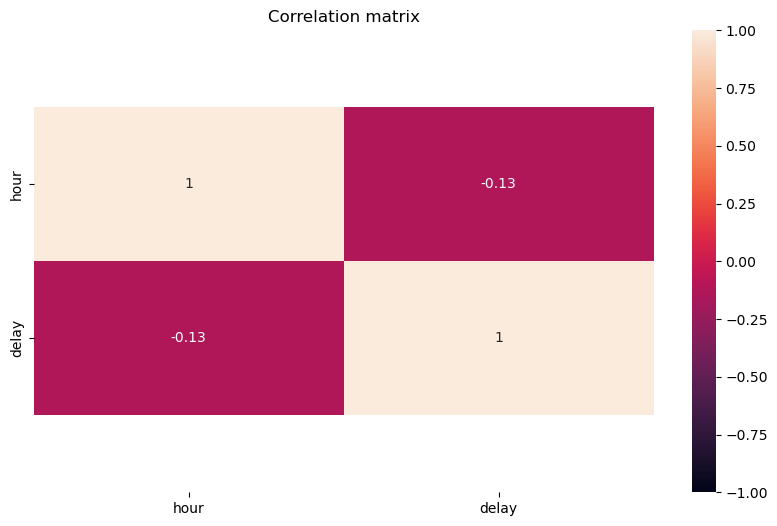

In [58]:
#Let's start with a simple correlation matrix. Is there any correlation between the delay and the time of the day?

#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.heatmap(departures_data.loc[:,['hour','delay']].corr(), vmin=-1, vmax=1, annot=True,);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation matrix')
plt.show()

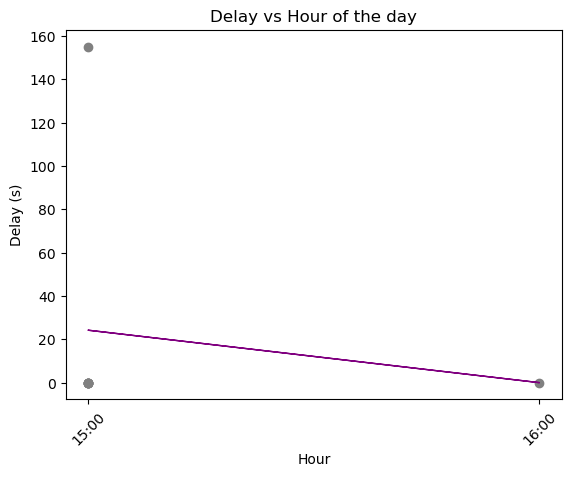

Intercept :  [386.85714286]
Slope coefficient :  [[-24.17857143]]
Mean Squared Error (MSE) :  2577.733258928571
Root Mean Square Error (RMSE) :  50.77138228302014
Mean Absolute Error(MAE) :  34.48660714285715
R Square :  0.019028223151904


In [60]:
#A simple regression model (delay vs time)

#Import the necessary libraries
from IPython.core.interactiveshell import InteractiveShell
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn import linear_model

#Set the independent and dependent variable
x = departures_data[['hour']] #independent
y = departures_data[['delay']]; #dependent

#Split into train-test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Load the model
lr = LinearRegression()
# Train the model
model1 = lr.fit(x_train,y_train)
# Make prediction on test set
y_pred1 = model1.predict(x_test)

min_hour = min(x['hour'])
max_hour = max(x['hour'])
x_test_hours = np.arange(min_hour, max_hour + 1)  # Assuming the data spans consecutive hours
x_test_times = [f'{hour}:00' for hour in x_test_hours]  # Assuming the data represents whole hours


#Show the results
plt.plot(x_test, y_pred1, color='purple', linewidth=1)
plt.scatter(x_test, y_test,  color='gray')
plt.title('Delay vs Hour of the day')
plt.xticks(x_test_hours, x_test_times, rotation=45)
plt.xlabel('Hour')
plt.ylabel('Delay (s)')
plt.show()

#Estimation of model parameters
print ('Intercept : ', model1.intercept_)
print ('Slope coefficient : ', model1.coef_)

# Compute MSE, RMSE, MAE and R2
print ('Mean Squared Error (MSE) : ', mean_squared_error(y_test,y_pred1))
print ('Root Mean Square Error (RMSE) : ', np.sqrt( mean_squared_error(y_test,y_pred1)))
print ('Mean Absolute Error(MAE) : ',mean_absolute_error(y_test,y_pred1))
print('R Square : ', r2_score(y_test,y_pred1))